In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pylab
import seaborn as sns
#plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

In [3]:
#task1
df = pd.read_excel('../datasets/данные_для_кластеризации.xlsx')
df

weekday_sin  weekday_cos  Order_bac_sin  Order_bac_cos  \
0         0.974928    -0.222521   6.609058e-02       0.997814   
1         0.974928    -0.222521   6.609058e-02       0.997814   
2         0.974928    -0.222521   6.609058e-02       0.997814   
3         0.974928    -0.222521   6.609058e-02       0.997814   
4         0.974928    -0.222521   1.318922e-01       0.991264   
...            ...          ...            ...            ...   
20786    -0.781831     0.623490  -1.318922e-01       0.991264   
20787    -0.781831     0.623490  -6.609058e-02       0.997814   
20788    -0.781831     0.623490  -6.609058e-02       0.997814   
20789    -0.781831     0.623490  -2.449294e-16       1.000000   
20790    -0.781831     0.623490  -2.449294e-16       1.000000   

       Delivery_time_norm  Rain  Office  
0                0.508994     1       1  
1               -0.973604     1       1  
2                2.584630     1       1  
3                1.102033     1       0  
4                0.212474     1       1  
...                   ...   ...     ...  
20786           -1.270124     1       1  
20787            0.508994     1       1  
20788            0.212474     1       1  
20789            0.212474     1       1  
20790           -0.973604     1       1  

[20791 rows x 7 columns]

In [4]:
y = df['Office']
X = df[['weekday_sin', 'weekday_cos', 'Order_bac_sin', 'Order_bac_cos', 'Delivery_time_norm', 'Rain']]
print(X)
X = (X - X.mean(axis=0))/X.std(axis=0)
X

       weekday_sin  weekday_cos  Order_bac_sin  Order_bac_cos  \
0         0.974928    -0.222521   6.609058e-02       0.997814   
1         0.974928    -0.222521   6.609058e-02       0.997814   
2         0.974928    -0.222521   6.609058e-02       0.997814   
3         0.974928    -0.222521   6.609058e-02       0.997814   
4         0.974928    -0.222521   1.318922e-01       0.991264   
...            ...          ...            ...            ...   
20786    -0.781831     0.623490  -1.318922e-01       0.991264   
20787    -0.781831     0.623490  -6.609058e-02       0.997814   
20788    -0.781831     0.623490  -6.609058e-02       0.997814   
20789    -0.781831     0.623490  -2.449294e-16       1.000000   
20790    -0.781831     0.623490  -2.449294e-16       1.000000   

       Delivery_time_norm  Rain  
0                0.508994     1  
1               -0.973604     1  
2                2.584630     1  
3                1.102033     1  
4                0.212474     1  
...            

weekday_sin  weekday_cos  Order_bac_sin  Order_bac_cos  \
0         1.292388    -0.112715       0.689154       1.639788   
1         1.292388    -0.112715       0.689154       1.639788   
2         1.292388    -0.112715       0.689154       1.639788   
3         1.292388    -0.112715       0.689154       1.639788   
4         1.292388    -0.112715       0.811950       1.631079   
...            ...          ...            ...            ...   
20786    -1.144099     1.138877       0.319686       1.631079   
20787    -1.144099     1.138877       0.442482       1.639788   
20788    -1.144099     1.138877       0.442482       1.639788   
20789    -1.144099     1.138877       0.565818       1.642695   
20790    -1.144099     1.138877       0.565818       1.642695   

       Delivery_time_norm      Rain  
0                0.508994  1.227961  
1               -0.973604  1.227961  
2                2.584630  1.227961  
3                1.102033  1.227961  
4                0.212474  1.227961  
...                   ...       ...  
20786           -1.270124  1.227961  
20787            0.508994  1.227961  
20788            0.212474  1.227961  
20789            0.212474  1.227961  
20790           -0.973604  1.227961  

[20791 rows x 6 columns]

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

In [7]:
def metrics4(X, labels, y):
    result = [adjusted_rand_score(y, labels)]
    result.append(silhouette_score(X, labels, random_state=21))
    result.append(calinski_harabasz_score(X, labels))
    result.append(davies_bouldin_score(X, labels))
    return result


In [24]:


m4 = pd.DataFrame(columns=['adjusted_rand_score','silhouette_score', 'calinski_harabasz_score',
                           'davies_bouldin_score'])
for k in range(2, 101):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    m4.loc[k] = metrics4(X, km.labels_, y)
m4

Empty DataFrame
Columns: [adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score]
Index: []


adjusted_rand_score  silhouette_score  calinski_harabasz_score  \
2               0.432206          0.250400              6832.006453   
3               0.331088          0.226171              5420.426884   
4               0.237858          0.245373              5118.421879   
5               0.274405          0.243349              4681.138922   
6               0.228159          0.251527              4555.988565   
..                   ...               ...                      ...   
96              0.021915          0.355665              2735.406065   
97              0.020724          0.348225              2743.658817   
98              0.021603          0.355046              2722.865962   
99              0.020409          0.359986              2746.021810   
100             0.019684          0.347314              2705.676471   

     davies_bouldin_score  
2                1.702163  
3                1.605361  
4                1.689126  
5                1.578714  
6                1.454711  
..                    ...  
96               1.015395  
97               1.027055  
98               1.026244  
99               1.011231  
100              1.033509  

[99 rows x 4 columns]

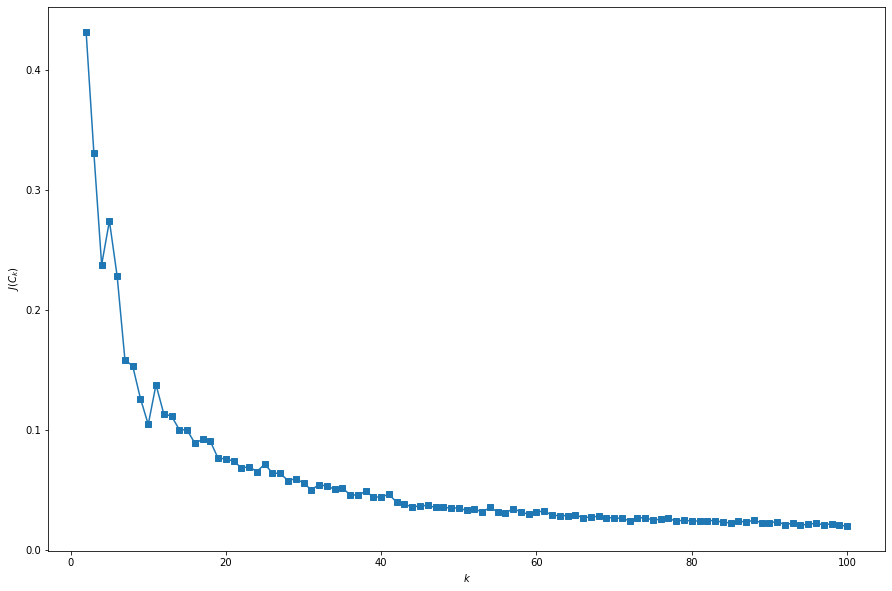

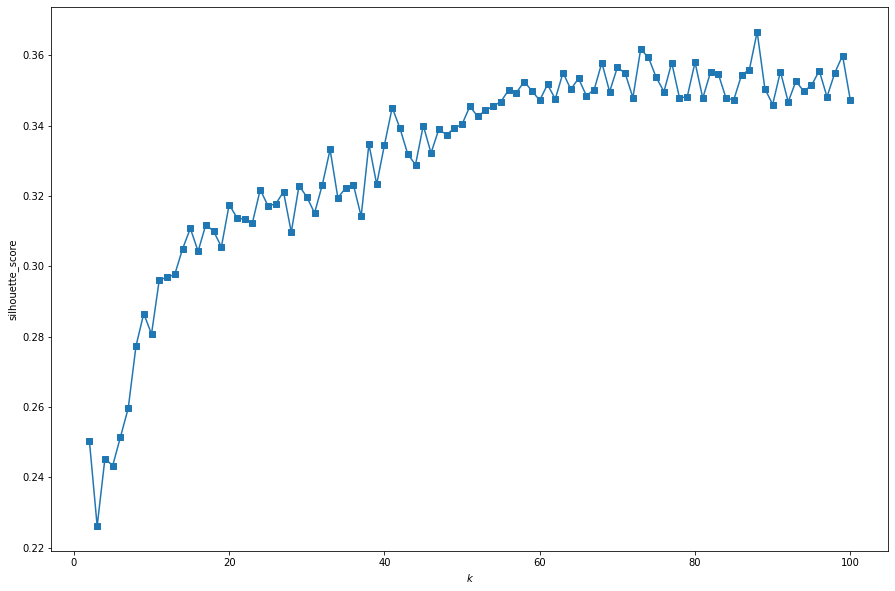

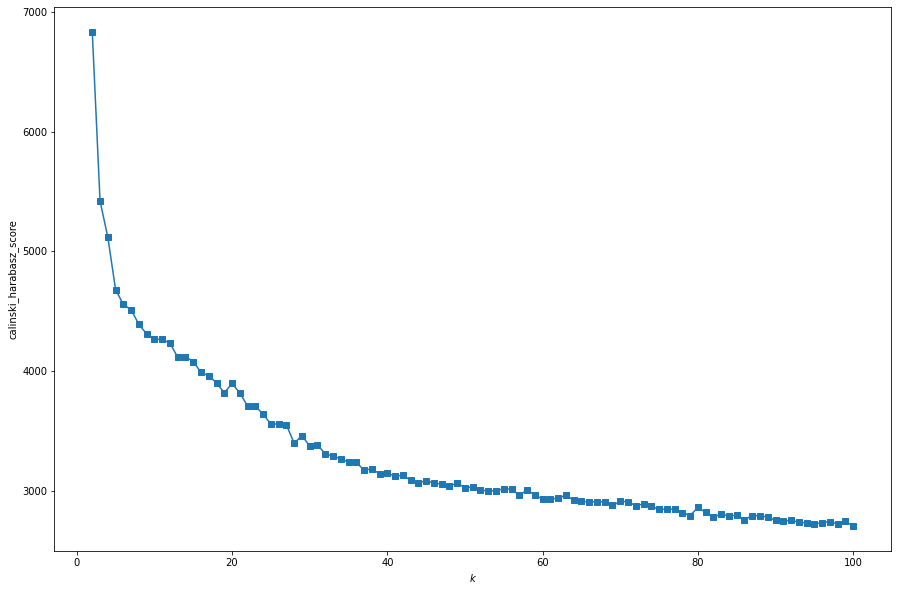

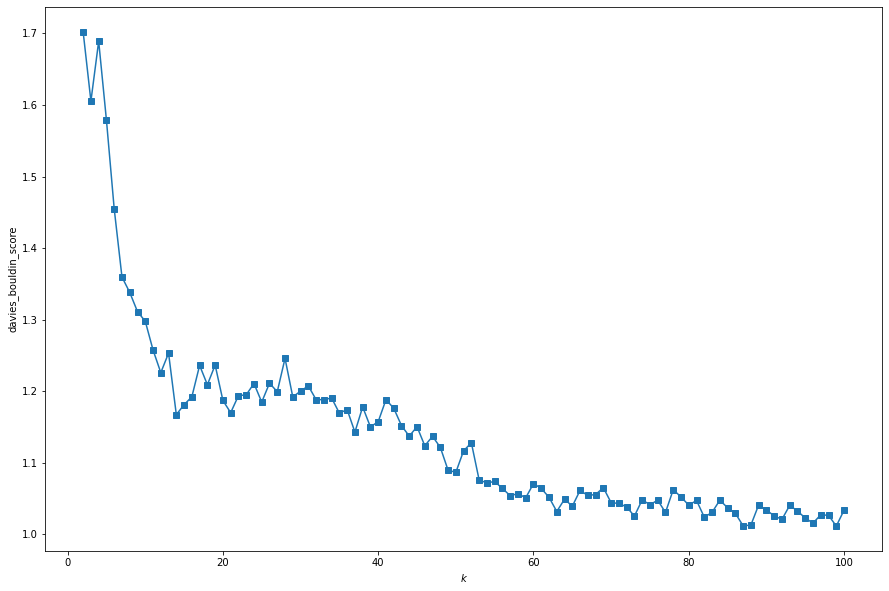

In [25]:
plt.plot(range(2, 101), m4['adjusted_rand_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

plt.plot(range(2, 101), m4['silhouette_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('silhouette_score')
plt.show()


plt.plot(range(2, 101), m4['calinski_harabasz_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('calinski_harabasz_score')
plt.show()


plt.plot(range(2, 101), m4['davies_bouldin_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('davies_bouldin_score')
plt.show()

[]

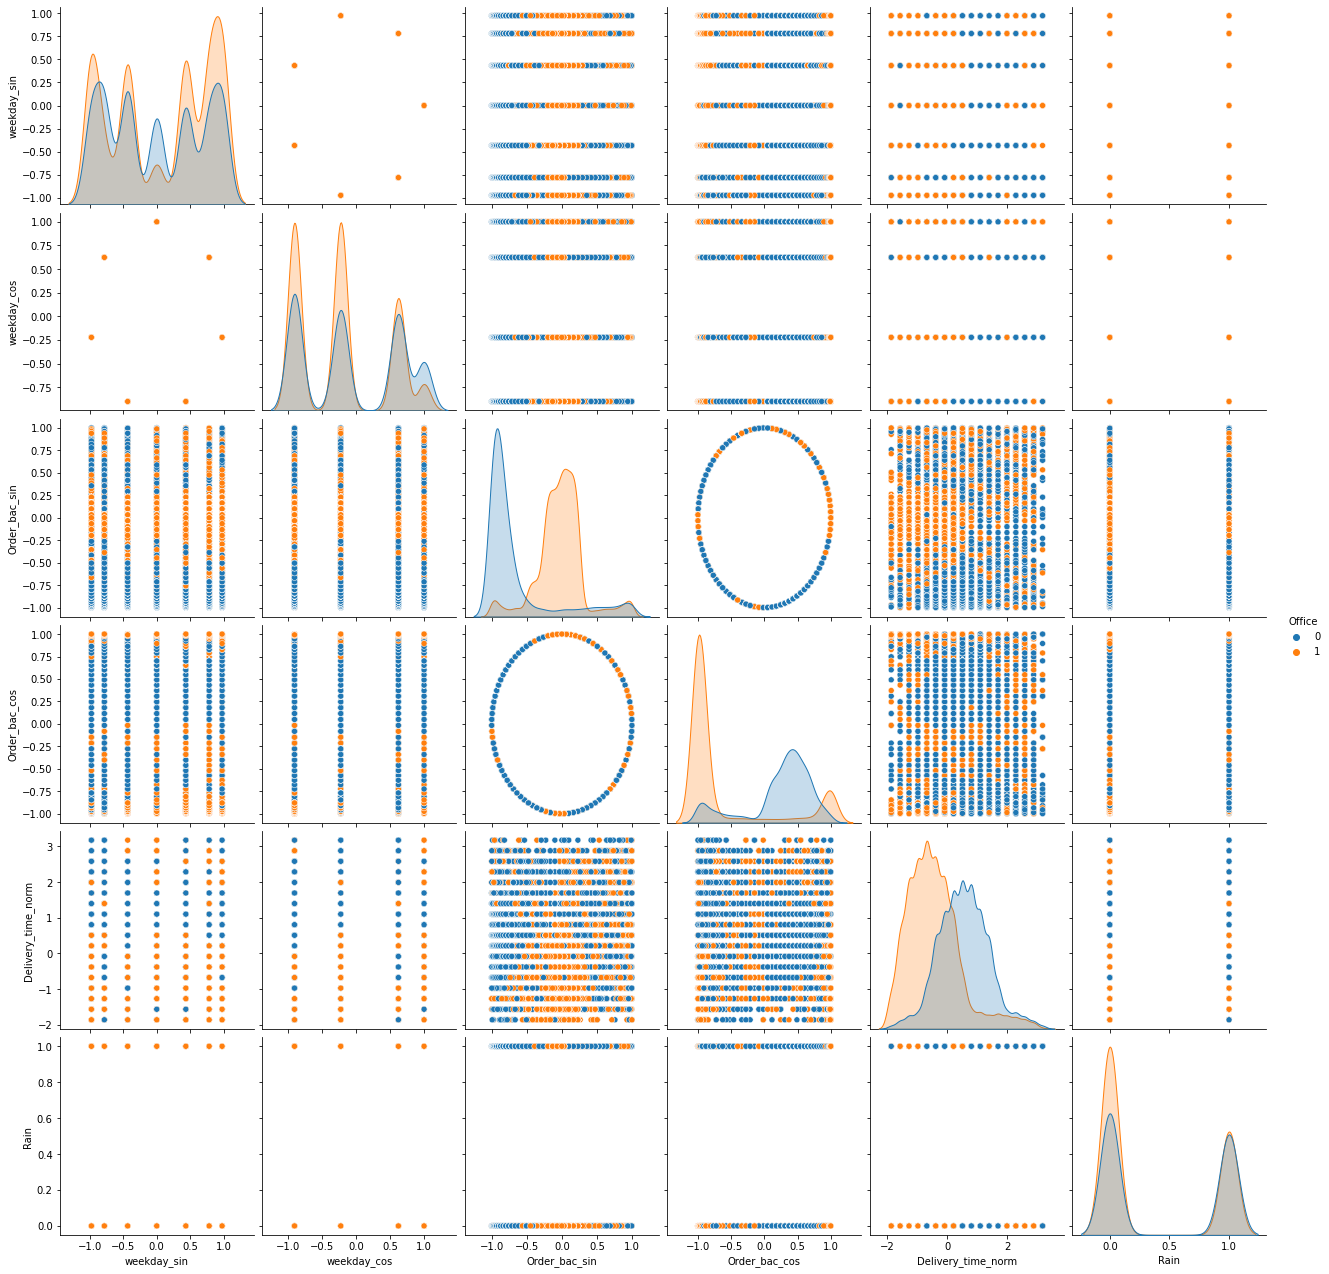

In [50]:
sns.pairplot(df, hue="Office", height=3)
plt.plot()


In [8]:
kmeans = KMeans(n_clusters=2, random_state=21).fit(X)
#plt.scatter(X['weekday_cos'], X['Delivery_time_norm'], c=kmeans.labels_)
#plt.show()
print(classification_report(y, kmeans.labels_))
m4_2 = pd.DataFrame(index = ['adjusted_rand_score', 'silhouette_score', 'calinski_harabasz_score', 
                           'davies_bouldin_score'])
m4_2['KMeans'] = metrics4(X, kmeans.labels_, y)
m4_2

              precision    recall  f1-score   support

           0       0.13      0.15      0.14      9389
           1       0.21      0.19      0.20     11402

    accuracy                           0.17     20791
   macro avg       0.17      0.17      0.17     20791
weighted avg       0.18      0.17      0.17     20791



KMeans
adjusted_rand_score         0.432206
silhouette_score            0.250400
calinski_harabasz_score  6832.006453
davies_bouldin_score        1.702163

In [9]:
#задание 2

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy


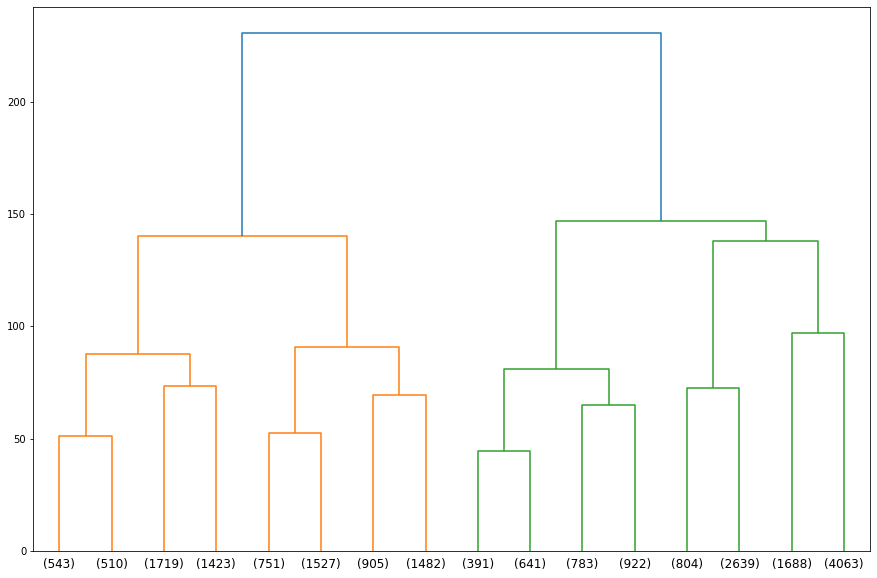

In [10]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    hierarchy.dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plot_dendrogram(model, truncate_mode='level', p=3)

In [11]:
model_2 = AgglomerativeClustering(n_clusters=2).fit(X)
y_ac = np.full(y.shape, fill_value=np.nan)
for j in range(2):
     y_ac[y == j] = round(model_2.labels_[y==j].mean(), 0)
print(classification_report(y_ac, model_2.labels_))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     11402
         1.0       0.90      0.85      0.88      9389

    accuracy                           0.89     20791
   macro avg       0.89      0.89      0.89     20791
weighted avg       0.89      0.89      0.89     20791



In [12]:
m4_2['AgglomerativeClustering'] = metrics4(X, model_2.labels_, y_ac)
m4_2

KMeans  AgglomerativeClustering
adjusted_rand_score         0.432206                 0.610707
silhouette_score            0.250400                 0.221143
calinski_harabasz_score  6832.006453              5635.513978
davies_bouldin_score        1.702163                 1.845790

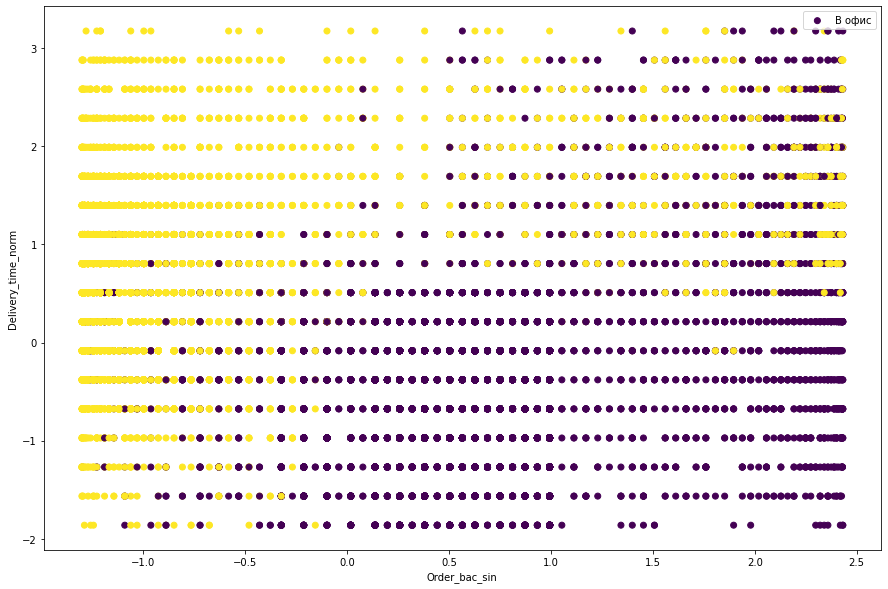

In [13]:
plt.scatter(X['Order_bac_sin'], X['Delivery_time_norm'], c=model_2.labels_)
plt.legend(['В офис'])
plt.xlabel('Order_bac_sin')
plt.ylabel('Delivery_time_norm')
plt.show()

In [14]:
#задание 3
from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

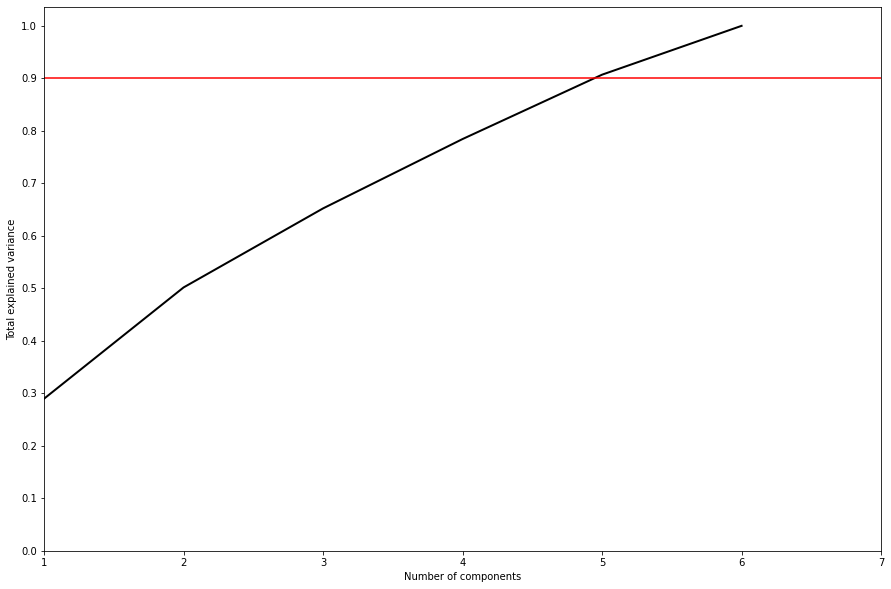

Первые 4 главных компоненты сохраняют 78.44% дисперсии, 5 компоненты - 90.7%


In [15]:
plt.plot(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, 7)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show()
print('Первые 4 главных компоненты сохраняют', str(round(100*pca.explained_variance_ratio_[:4].sum(),2))+'%', 
      'дисперсии, 5 компоненты -', str(round(100*pca.explained_variance_ratio_[:5].sum(),2))+'%')

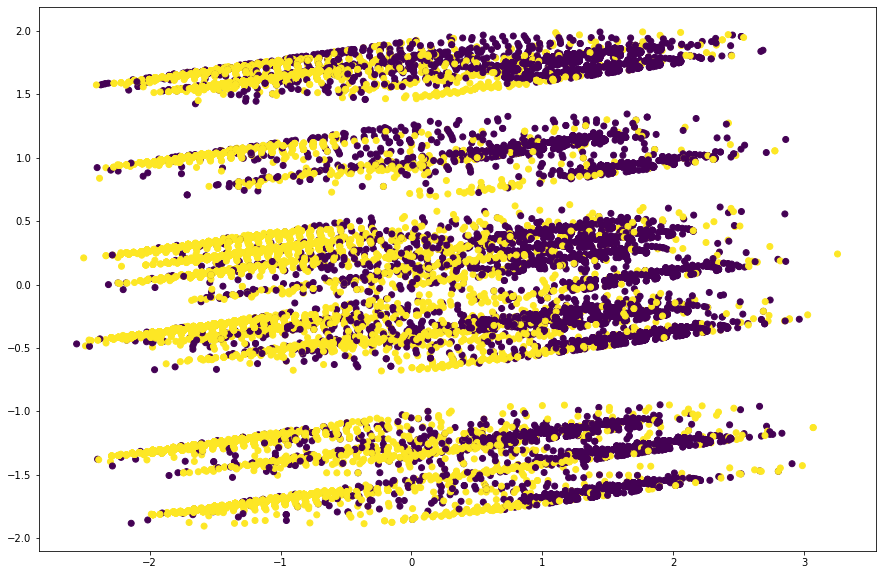

In [18]:
pca = PCA(n_components=2, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

In [35]:
#задание 4

from sklearn.manifold import TSNE


/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


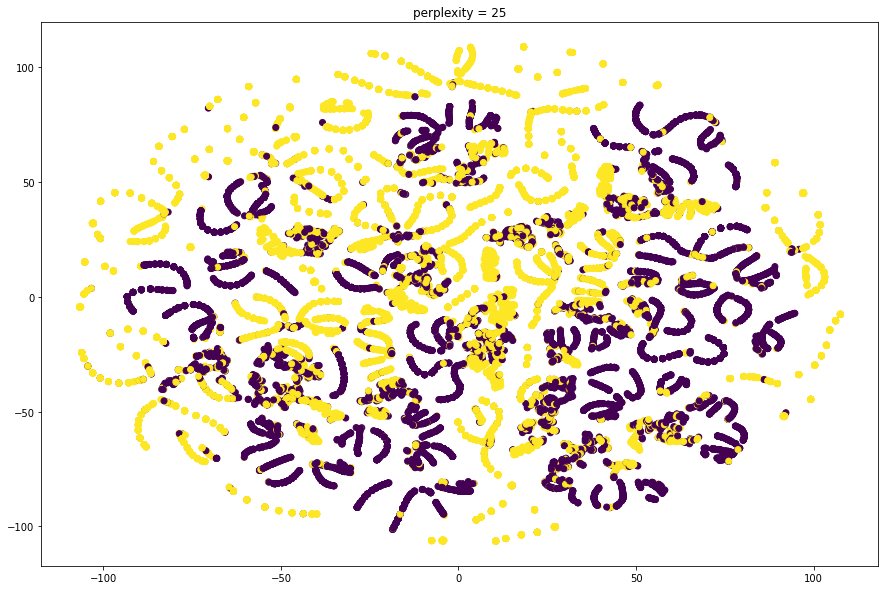

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


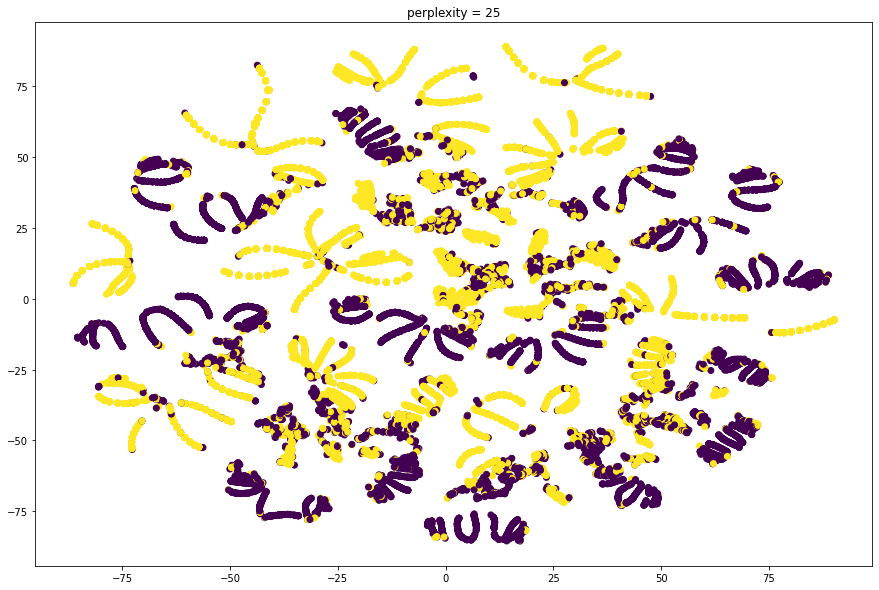

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


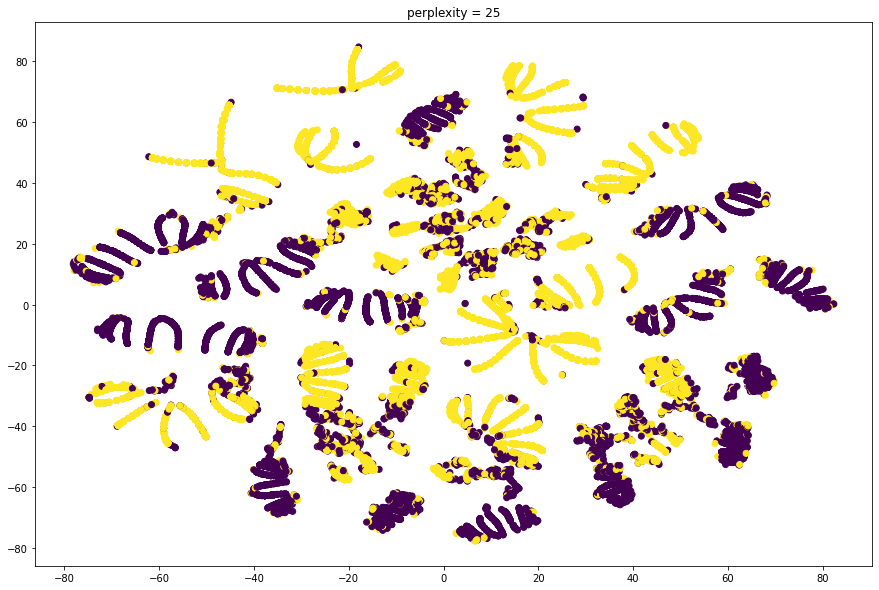

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


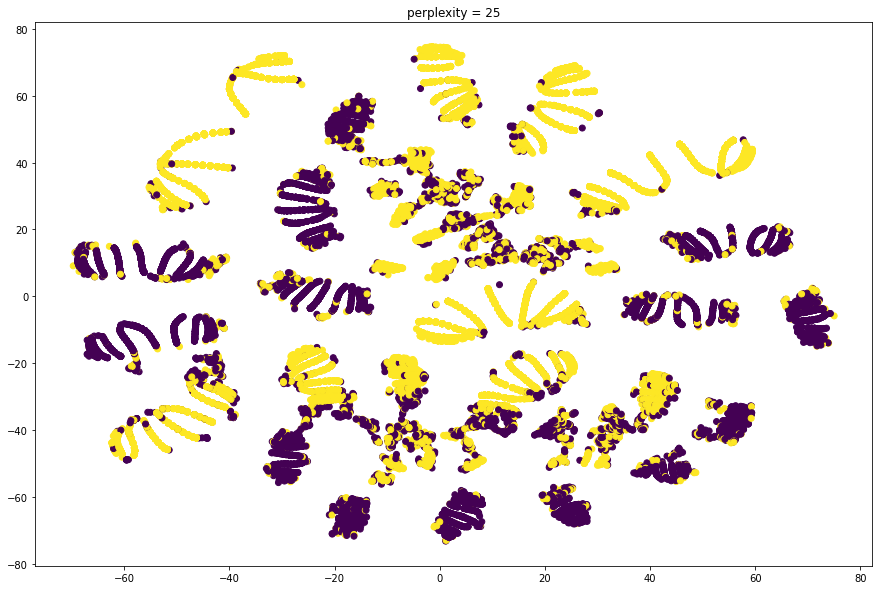

In [36]:
for i in range(1, 5): 
    tsne = TSNE(n_components=2, perplexity=25*i, random_state=21)
    tsne_representation = tsne.fit_transform(X)
    plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=y)
    #plt.title('perplexity = ', 25 * i)
    plt.show()

In [39]:
#задание 5

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [38]:
tsne = TSNE(n_components=2, perplexity=15, random_state=21)
tsne_X = tsne.fit_transform(X)

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


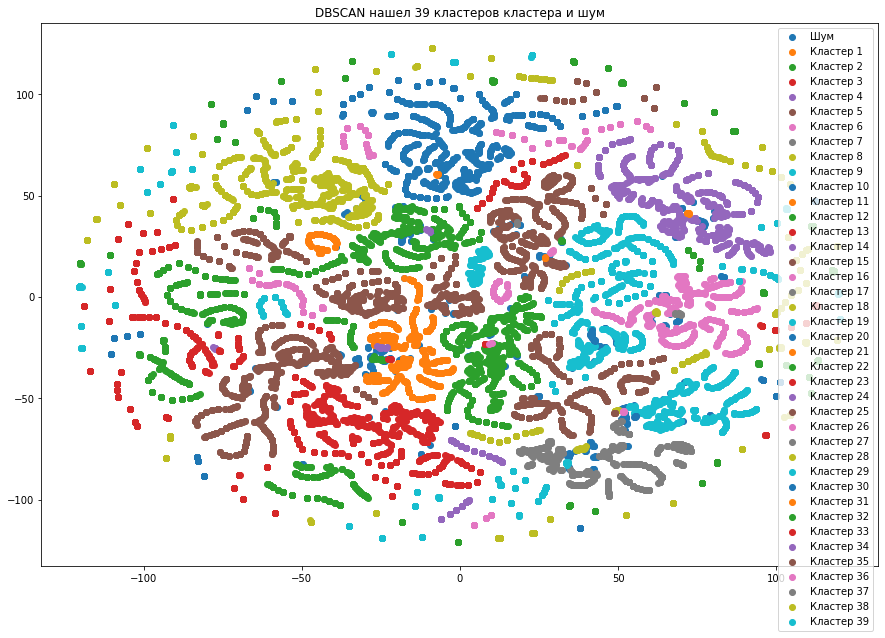

In [72]:
dbscan = DBSCAN()
dbscan.fit(X)

def add_a_ov(n, word):
    n = n%100
    if n%10 in [2,3,4] and n//10 != 1:
        result = word + 'а'
    elif n%10 == 1 and n != 11:
        result = word
    else:
        result = word + 'ов'
    return result

def viz_dbscan(labels, x2d):
    clstr = []
    k = labels.min()
    if k == -1:
        title = ['DBSCAN нашел ', ' кластера и шум']
    else:
        title = ['DBSCAN нашел ', ' кластера']
    for j in range(k, labels.max()+1):
        plt.scatter(x2d[labels==j, 0], x2d[labels==j, 1])
        if j == -1:
            clstr = ['Шум']
        else:
            clstr.append('Кластер '+str(j+1))
    plt.legend(clstr)
    n = len(clstr)+k
    plt.title(title[0] + str(n) + " " + add_a_ov(n, "кластер") + title[1])
    plt.show()
    
viz_dbscan(dbscan.labels_, tsne_X)

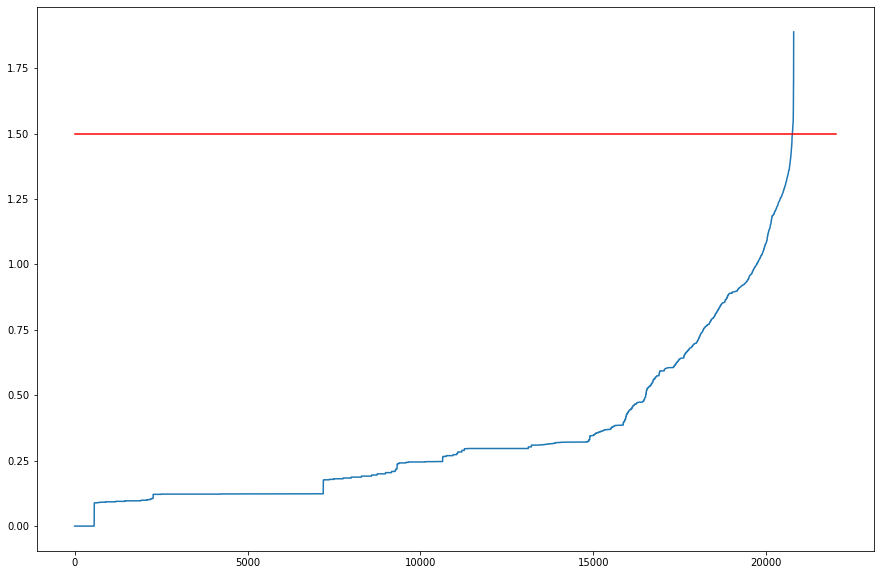

In [73]:
model_NN = NearestNeighbors(n_neighbors=25)
model_NN.fit(X)
dist, _ = model_NN.kneighbors(X, n_neighbors=25, return_distance=True)
dist = np.sort(dist[:,-1])
plt.plot(dist)
plt.plot([0,22000], [1.5, 1.5], 'r')
plt.show()

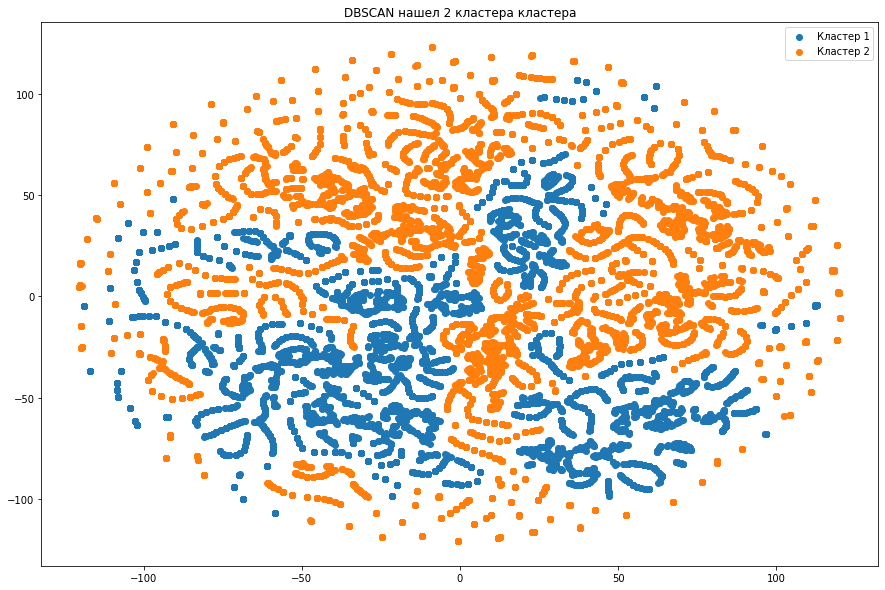

In [78]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(X)
viz_dbscan(dbscan.labels_, tsne_X)

In [79]:
for j in range(dbscan.labels_.max()+1):
    print('метка класса =', j, '   метка кластера =', dbscan.labels_[y==j].mean(), 
          '   стандартное отклонение меток кластера =', dbscan.labels_[y==j].std())


метка класса = 0    метка кластера = 0.5475556502289913    стандартное отклонение меток кластера = 0.4977333223035182
метка класса = 1    метка кластера = 0.6455007893352044    стандартное отклонение меток кластера = 0.47836128637550973


In [80]:
y_ac = np.full(y.shape, fill_value=np.nan)
for j in range(2):
     y_ac[y == j] = int(dbscan.labels_[y==j].mean())
print(classification_report(y_ac, dbscan.labels_))

              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57     20791
         1.0       0.00      0.00      0.00         0

    accuracy                           0.40     20791
   macro avg       0.50      0.20      0.29     20791
weighted avg       1.00      0.40      0.57     20791



/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
m4_2['DBSCAN'] = metrics4(X, dbscan.labels_, y_ac)
m4_2

KMeans  AgglomerativeClustering       DBSCAN
adjusted_rand_score         0.432206                 0.610707     0.000000
silhouette_score            0.250400                 0.221143     0.194839
calinski_harabasz_score  6832.006453              5635.513978  4462.031761
davies_bouldin_score        1.702163                 1.845790     2.074507

In [64]:
print('DBSCAN определил', str(len(dbscan.labels_[dbscan.labels_==-1])/10) +'%', 'данных как шум')

DBSCAN определил 429.3% данных как шум


In [70]:
def test(n, word):
    n = n%100
    if n%10 in [2,3,4] and n//10 != 1:
        result = word + 'а'
    elif n%10 == 1 and n != 11:
        result = word
    else:
        result = word + 'ов'
    return result


for j in [i for i in range(31)]+[101,102,105,111,112,1001,1002,1005,1011,1012,1021,1022]:
    if test(j, 'слон') != add_a_ov(j, 'слон'):
        break
if j < 1022:
    print(j, add_a_ov(j, 'слон'))
    if j < 10:
        print('Функция содержит критичные ошибки')
    elif j < 20:
        print('Функция содержит критичные ошибки. Не верно обрабатываются числительные от 11 до 14')
    elif j < 100:
        print('Функция содержит критичные ошибки. Не верно обрабатываются числительные от 20 до 100')
    elif j < 1000:
        print('Функция содержит не критичные для задачи ошибки.', 
              'Не верно обрабатываются числительные свыше 100')
    elif j >= 1000:
        print('Функция содержит не критичные для задачи ошибки.', 
              'Не верно обрабатываются числительные от 1000 и выше')
else:
    print('Функция работает нормально')

Функция работает нормально


In [ ]:
#все что выше для дождя

In [83]:
y = df['Rain']
X = df[['weekday_sin', 'weekday_cos', 'Order_bac_sin', 'Order_bac_cos', 'Delivery_time_norm', 'Office']]
print(X)
X = (X - X.mean(axis=0))/X.std(axis=0)
X

       weekday_sin  weekday_cos  Order_bac_sin  Order_bac_cos  \
0         0.974928    -0.222521   6.609058e-02       0.997814   
1         0.974928    -0.222521   6.609058e-02       0.997814   
2         0.974928    -0.222521   6.609058e-02       0.997814   
3         0.974928    -0.222521   6.609058e-02       0.997814   
4         0.974928    -0.222521   1.318922e-01       0.991264   
...            ...          ...            ...            ...   
20786    -0.781831     0.623490  -1.318922e-01       0.991264   
20787    -0.781831     0.623490  -6.609058e-02       0.997814   
20788    -0.781831     0.623490  -6.609058e-02       0.997814   
20789    -0.781831     0.623490  -2.449294e-16       1.000000   
20790    -0.781831     0.623490  -2.449294e-16       1.000000   

       Delivery_time_norm  Office  
0                0.508994       1  
1               -0.973604       1  
2                2.584630       1  
3                1.102033       0  
4                0.212474       1  
...

weekday_sin  weekday_cos  Order_bac_sin  Order_bac_cos  \
0         1.292388    -0.112715       0.689154       1.639788   
1         1.292388    -0.112715       0.689154       1.639788   
2         1.292388    -0.112715       0.689154       1.639788   
3         1.292388    -0.112715       0.689154       1.639788   
4         1.292388    -0.112715       0.811950       1.631079   
...            ...          ...            ...            ...   
20786    -1.144099     1.138877       0.319686       1.631079   
20787    -1.144099     1.138877       0.442482       1.639788   
20788    -1.144099     1.138877       0.442482       1.639788   
20789    -1.144099     1.138877       0.565818       1.642695   
20790    -1.144099     1.138877       0.565818       1.642695   

       Delivery_time_norm    Office  
0                0.508994  0.907421  
1               -0.973604  0.907421  
2                2.584630  0.907421  
3                1.102033 -1.101972  
4                0.212474  0.907421  
...                   ...       ...  
20786           -1.270124  0.907421  
20787            0.508994  0.907421  
20788            0.212474  0.907421  
20789            0.212474  0.907421  
20790           -0.973604  0.907421  

[20791 rows x 6 columns]

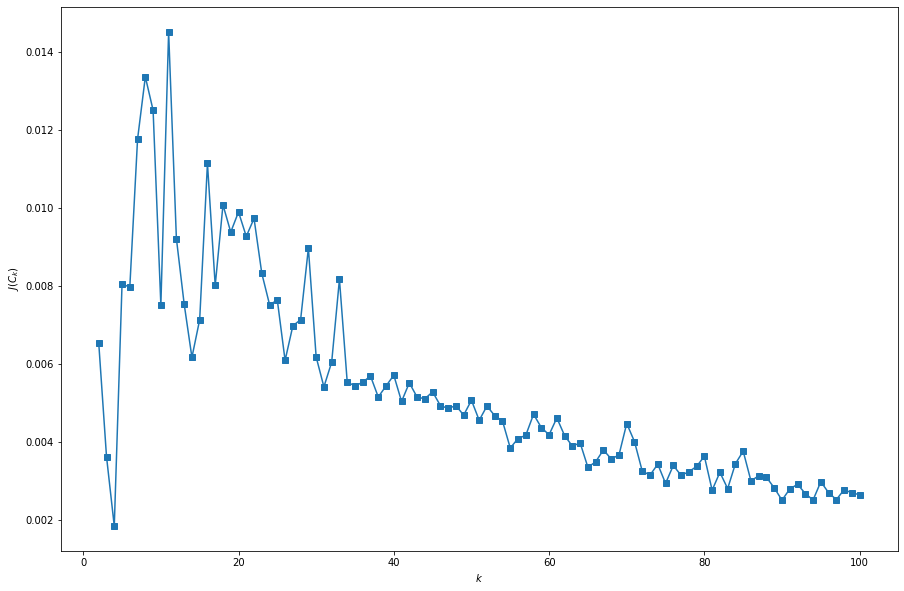

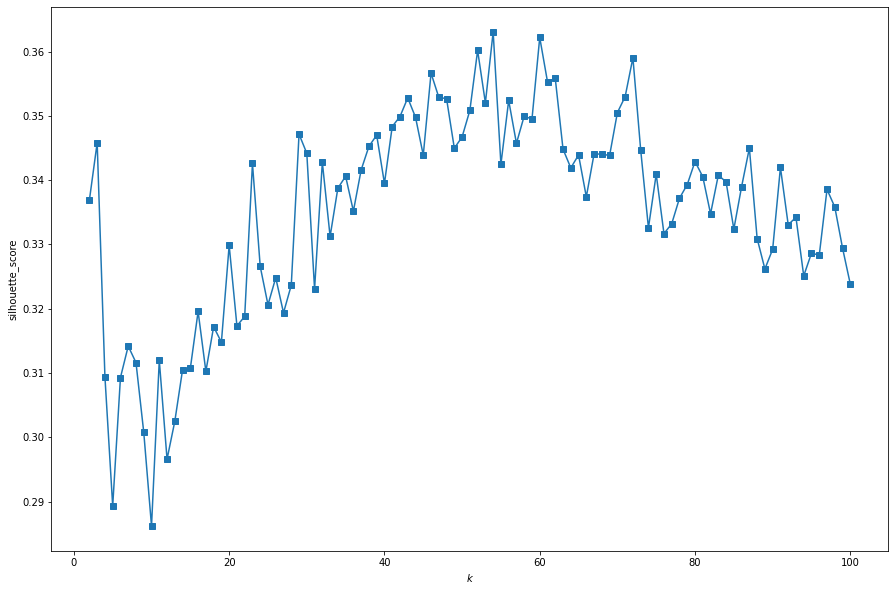

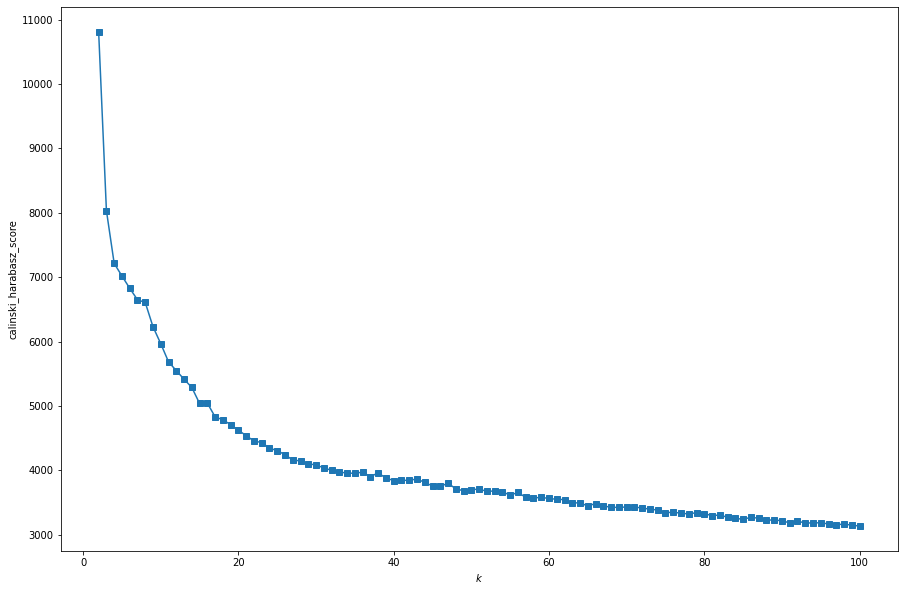

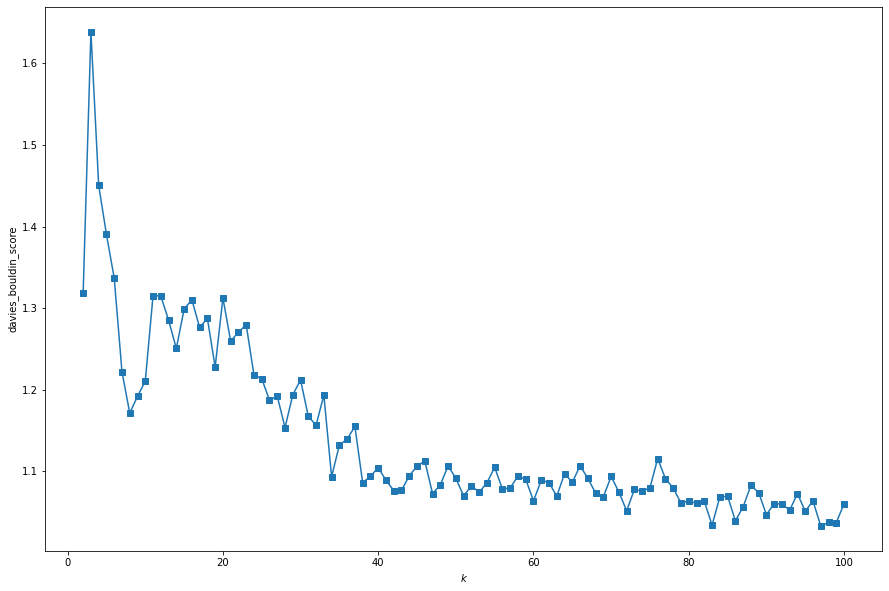

In [84]:
def metrics4(X, labels, y):
    result = [adjusted_rand_score(y, labels)]
    result.append(silhouette_score(X, labels, random_state=21))
    result.append(calinski_harabasz_score(X, labels))
    result.append(davies_bouldin_score(X, labels))
    return result

m4 = pd.DataFrame(columns=['adjusted_rand_score','silhouette_score', 'calinski_harabasz_score',
                           'davies_bouldin_score'])
for k in range(2, 101):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    m4.loc[k] = metrics4(X, km.labels_, y)
m4

plt.plot(range(2, 101), m4['adjusted_rand_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

plt.plot(range(2, 101), m4['silhouette_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('silhouette_score')
plt.show()


plt.plot(range(2, 101), m4['calinski_harabasz_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('calinski_harabasz_score')
plt.show()


plt.plot(range(2, 101), m4['davies_bouldin_score'], marker='s')
plt.xlabel('$k$')
plt.ylabel('davies_bouldin_score')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=2, random_state=21).fit(X)
#plt.scatter(X['weekday_cos'], X['Delivery_time_norm'], c=kmeans.labels_)
#plt.show()
print(classification_report(y, kmeans.labels_))
m4_2 = pd.DataFrame(index = ['adjusted_rand_score', 'silhouette_score', 'calinski_harabasz_score', 
                           'davies_bouldin_score'])
m4_2['KMeans'] = metrics4(X, kmeans.labels_, y)
m4_2

              precision    recall  f1-score   support

           0       0.63      0.58      0.60     12501
           1       0.43      0.48      0.46      8290

    accuracy                           0.54     20791
   macro avg       0.53      0.53      0.53     20791
weighted avg       0.55      0.54      0.55     20791



KMeans
adjusted_rand_score          0.006528
silhouette_score             0.336909
calinski_harabasz_score  10811.298510
davies_bouldin_score         1.318517

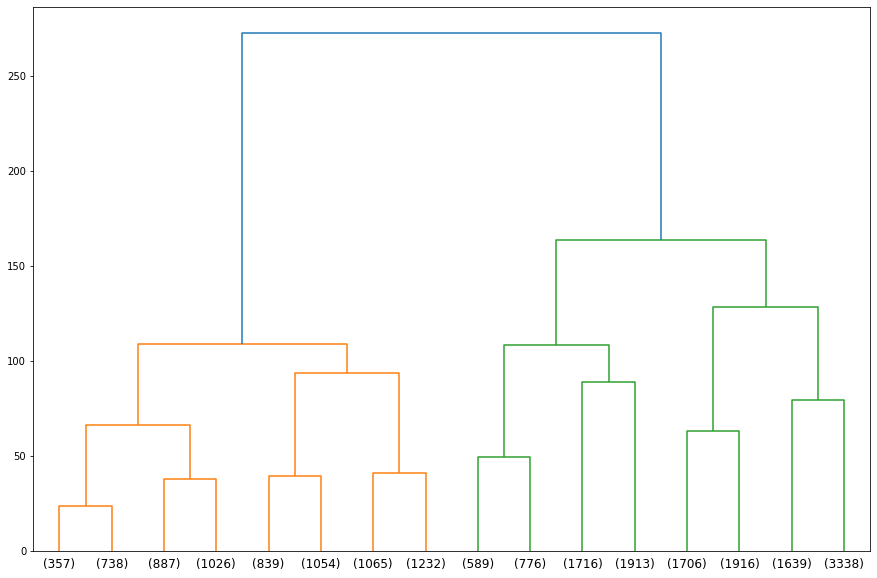

In [86]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    hierarchy.dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plot_dendrogram(model, truncate_mode='level', p=3)

In [87]:
model_2 = AgglomerativeClustering(n_clusters=2).fit(X)
y_ac = np.full(y.shape, fill_value=np.nan)
for j in range(2):
     y_ac[y == j] = round(model_2.labels_[y==j].mean(), 0)
print(classification_report(y_ac, model_2.labels_))

m4_2['AgglomerativeClustering'] = metrics4(X, model_2.labels_, y_ac)
m4_2

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79     20791
         1.0       0.00      0.00      0.00         0

    accuracy                           0.65     20791
   macro avg       0.50      0.33      0.40     20791
weighted avg       1.00      0.65      0.79     20791



KMeans  AgglomerativeClustering
adjusted_rand_score          0.006528                 0.000000
silhouette_score             0.336909                 0.302315
calinski_harabasz_score  10811.298510              8809.740018
davies_bouldin_score         1.318517                 1.336959

In [88]:
pca = PCA(n_components=6, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

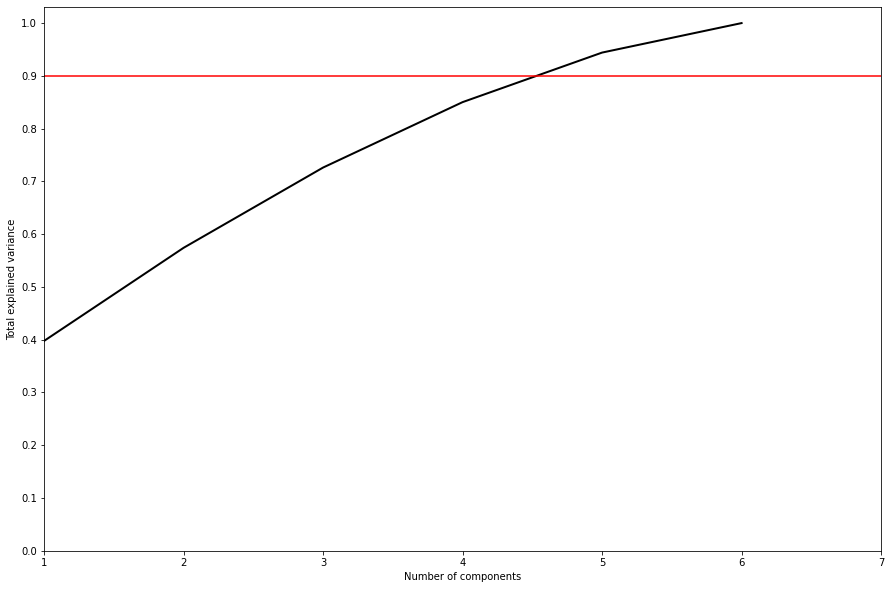

Первые 4 главных компоненты сохраняют 85.02% дисперсии, 5 компоненты - 94.41%


In [89]:
plt.plot(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, 7)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show()
print('Первые 4 главных компоненты сохраняют', str(round(100*pca.explained_variance_ratio_[:4].sum(),2))+'%', 
      'дисперсии, 5 компоненты -', str(round(100*pca.explained_variance_ratio_[:5].sum(),2))+'%')

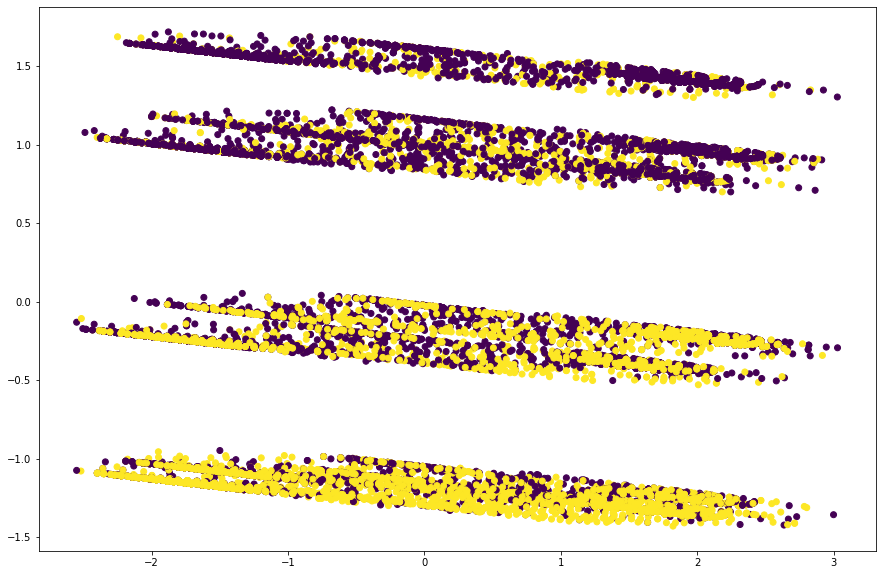

In [90]:
pca = PCA(n_components=2, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


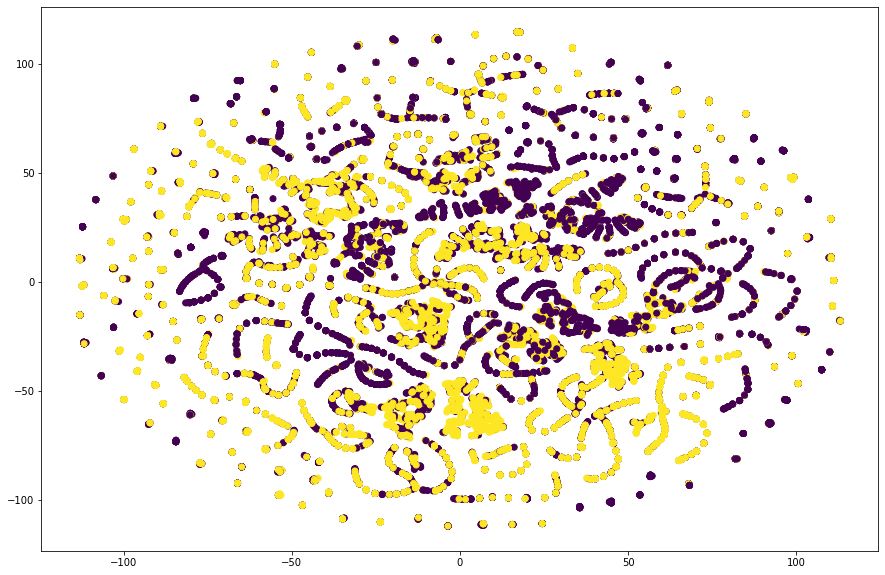

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


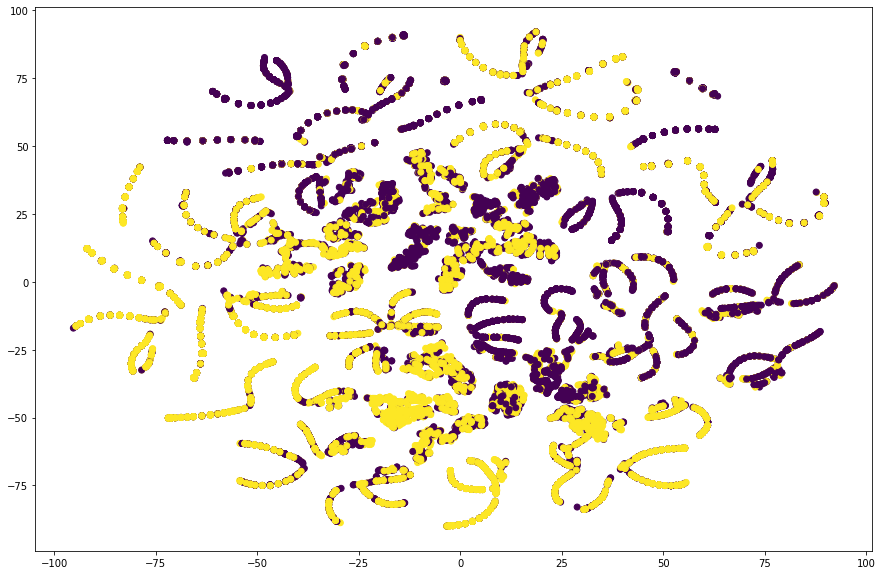

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


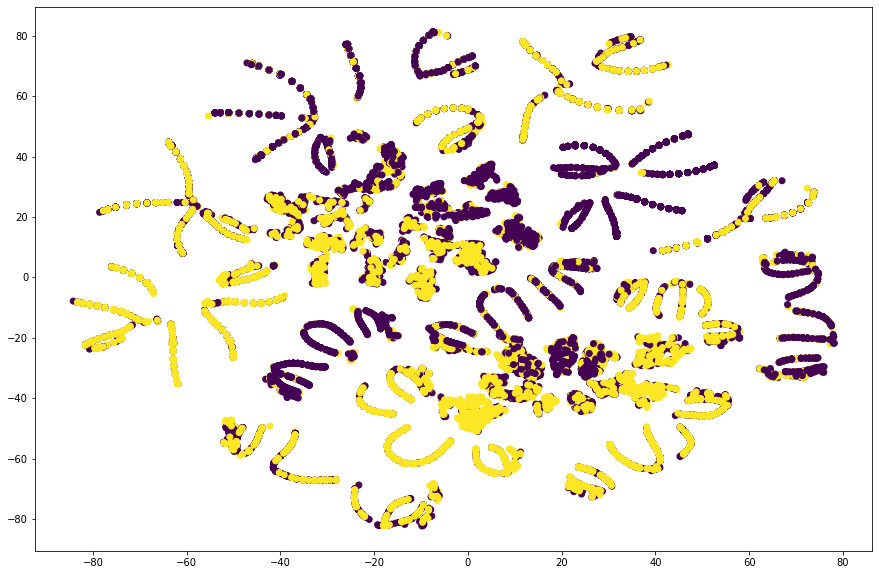

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


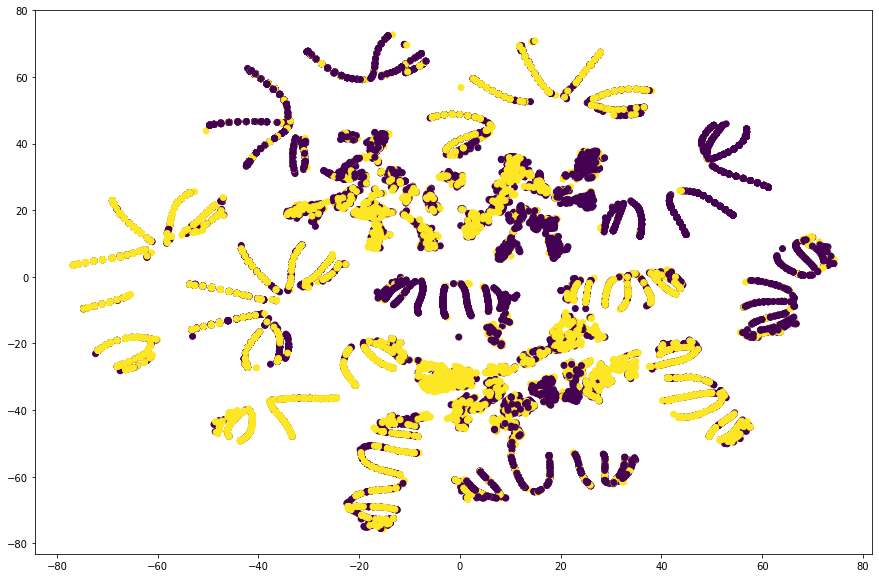

In [95]:
for i in range(1, 5): 
    tsne = TSNE(n_components=2, perplexity=25*i, random_state=21)
    tsne_representation = tsne.fit_transform(X)
    plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=y)
    #plt.title('perplexity = ', 25 * i)
    plt.show()

In [96]:
tsne = TSNE(n_components=2, perplexity=75, random_state=21)
tsne_X = tsne.fit_transform(X)

/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


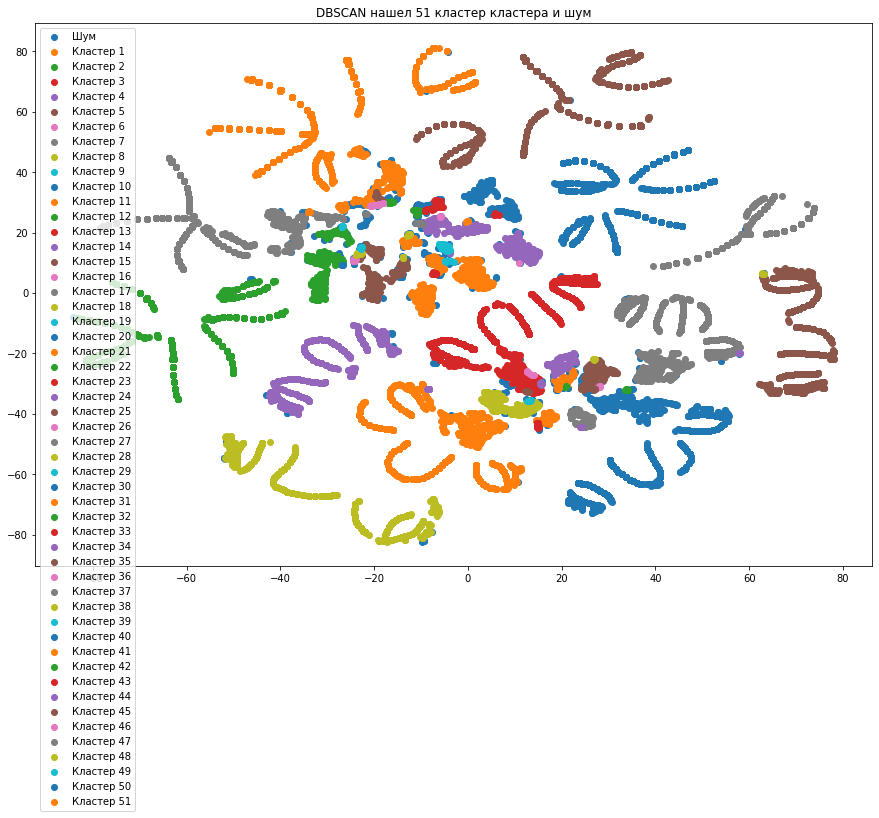

In [97]:
dbscan = DBSCAN()
dbscan.fit(X)

def add_a_ov(n, word):
    n = n%100
    if n%10 in [2,3,4] and n//10 != 1:
        result = word + 'а'
    elif n%10 == 1 and n != 11:
        result = word
    else:
        result = word + 'ов'
    return result

def viz_dbscan(labels, x2d):
    clstr = []
    k = labels.min()
    if k == -1:
        title = ['DBSCAN нашел ', ' кластера и шум']
    else:
        title = ['DBSCAN нашел ', ' кластера']
    for j in range(k, labels.max()+1):
        plt.scatter(x2d[labels==j, 0], x2d[labels==j, 1])
        if j == -1:
            clstr = ['Шум']
        else:
            clstr.append('Кластер '+str(j+1))
    plt.legend(clstr)
    n = len(clstr)+k
    plt.title(title[0] + str(n) + " " + add_a_ov(n, "кластер") + title[1])
    plt.show()
    
viz_dbscan(dbscan.labels_, tsne_X)

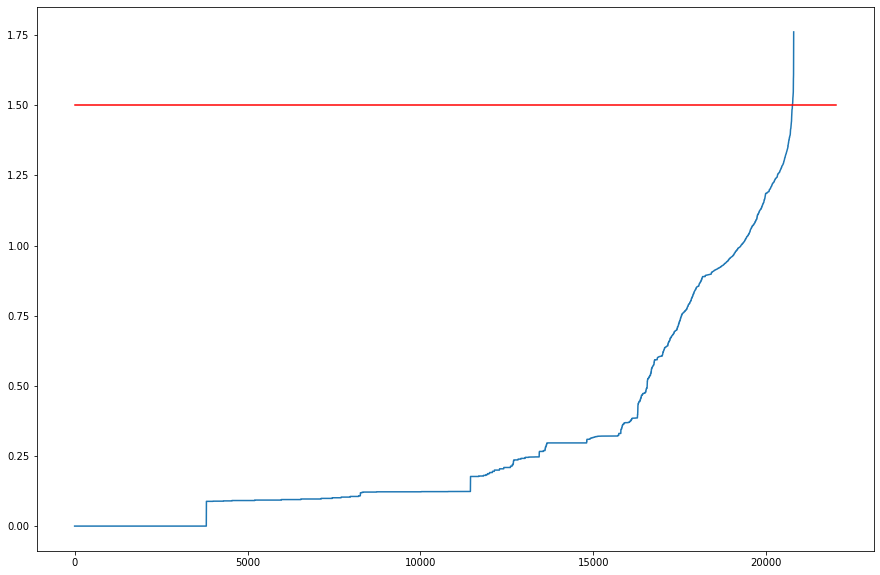

In [98]:
model_NN = NearestNeighbors(n_neighbors=25)
model_NN.fit(X)
dist, _ = model_NN.kneighbors(X, n_neighbors=25, return_distance=True)
dist = np.sort(dist[:,-1])
plt.plot(dist)
plt.plot([0,22000], [1.5, 1.5], 'r')
plt.show()

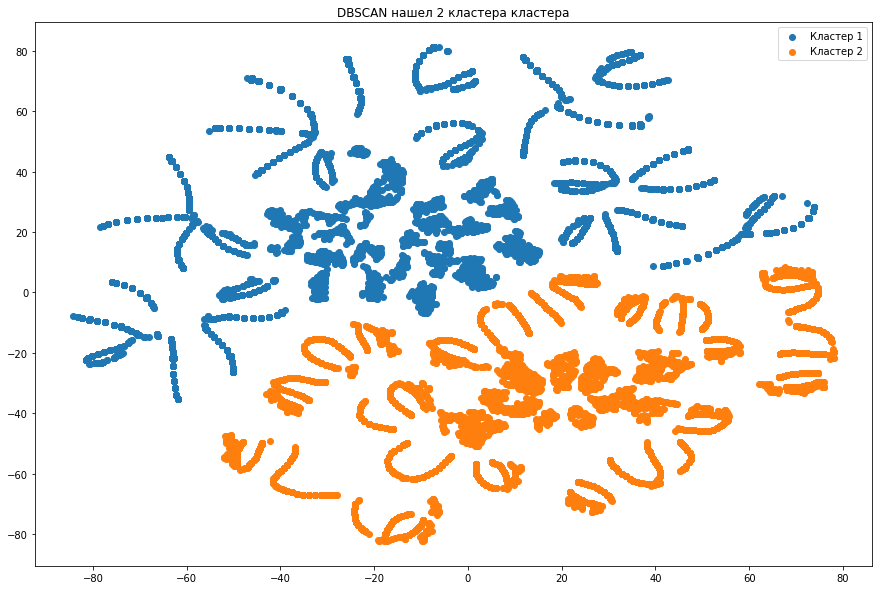

метка класса = 0    метка кластера = 0.41124710023198147    стандартное отклонение меток кластера = 0.4920598772332165
метка класса = 1    метка кластера = 0.5124246079613993    стандартное отклонение меток кластера = 0.49984560527927574


In [99]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(X)
viz_dbscan(dbscan.labels_, tsne_X)

for j in range(dbscan.labels_.max()+1):
    print('метка класса =', j, '   метка кластера =', dbscan.labels_[y==j].mean(), 
          '   стандартное отклонение меток кластера =', dbscan.labels_[y==j].std())


In [100]:
y_ac = np.full(y.shape, fill_value=np.nan)
for j in range(2):
     y_ac[y == j] = int(dbscan.labels_[y==j].mean())
print(classification_report(y_ac, dbscan.labels_))

              precision    recall  f1-score   support

         0.0       1.00      0.55      0.71     20791
         1.0       0.00      0.00      0.00         0

    accuracy                           0.55     20791
   macro avg       0.50      0.27      0.35     20791
weighted avg       1.00      0.55      0.71     20791



/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pskip/.brew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
m4_2['DBSCAN'] = metrics4(X, dbscan.labels_, y_ac)
m4_2

KMeans  AgglomerativeClustering       DBSCAN
adjusted_rand_score          0.006528                 0.000000     0.000000
silhouette_score             0.336909                 0.302315     0.320163
calinski_harabasz_score  10811.298510              8809.740018  9688.976927
davies_bouldin_score         1.318517                 1.336959     1.395052

In [102]:
print('DBSCAN определил', str(len(dbscan.labels_[dbscan.labels_==-1])/10) +'%', 'данных как шум')

DBSCAN определил 0.0% данных как шум
